In [36]:
from random import sample

import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from MMD import calculate_mmd

#Load data digit dataset
data = load_digits()
X = data.data  # shape (1797, 64)

# Define the KDE model with KDTree algorithm
bandwidth = [0.001,0.01,0.1,0.5]
#bandwidth = [0.001]
for i,h in enumerate(bandwidth):
    kde = KernelDensity(bandwidth = h,algorithm = 'kd_tree')
    kde.fit(X)
    X_gen = kde.sample(1000)
    
    mmd_values_exponential = np.zeros(len(bandwidth))
    mmd_values_multiquadratic = np.zeros(len(bandwidth))
    mmd_score = calculate_mmd(X, X_gen, bandwidths=[1.0, 2.0])
    for kernel, mmd_value in mmd_score.items():
        if kernel == 'squared_exponential':
            mmd_values_exponential[i] = mmd_value

        else:
            mmd_values_multiquadratic[i] = mmd_value
            
  

0.001
0.01
0.1
0.5


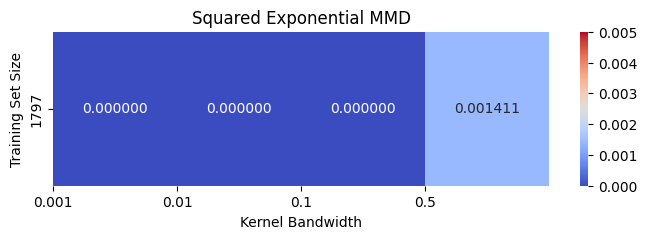

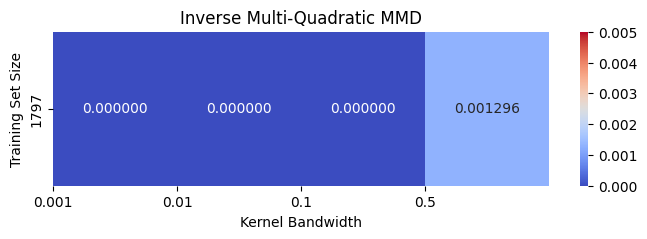

In [45]:
#plotting MMD results
import matplotlib.pyplot as plt
import seaborn as sns

n = [len(X)]

#EM
mmd_values_exponential2d = mmd_values_exponential.reshape(1, -1)
plt.figure(figsize=(8, 2))
sns.heatmap(mmd_values_exponential2d, annot=True, fmt=".6f", cmap="coolwarm",
            xticklabels=np.round(bandwidth, 3),
             yticklabels=n,
            vmin=0, vmax=0.005)
plt.xticks(range(len(bandwidth)), bandwidth)
plt.title('Squared Exponential MMD')
plt.xlabel('Kernel Bandwidth')
plt.ylabel('Training Set Size')
plt.show()


#IMQ
mmd_values_multi2d = mmd_values_multiquadratic.reshape(1, -1)
plt.figure(figsize=(8, 2))
sns.heatmap(mmd_values_multi2d, annot=True, fmt=".6f", cmap="coolwarm",
            xticklabels=np.round(bandwidth, 3),
            yticklabels=n,
            vmin=0, vmax=0.005)
plt.xticks(range(len(bandwidth)), bandwidth)
plt.title('Inverse Multi-Quadratic MMD')
plt.xlabel('Kernel Bandwidth')
plt.ylabel('Training Set Size')
plt.show()

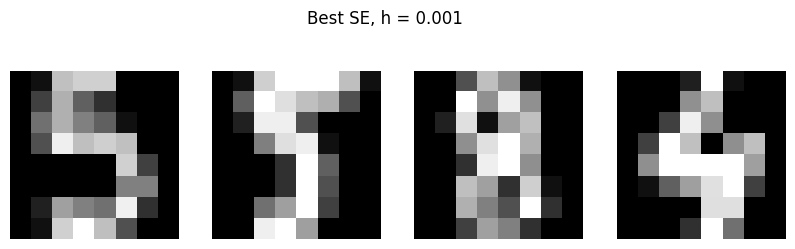

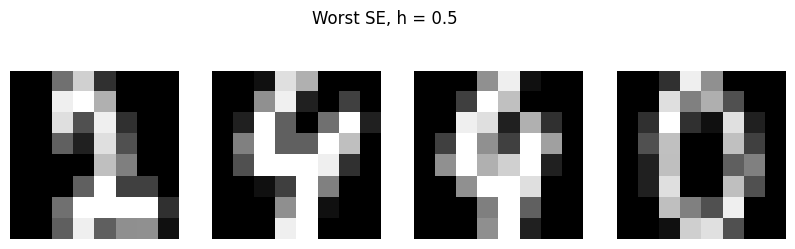

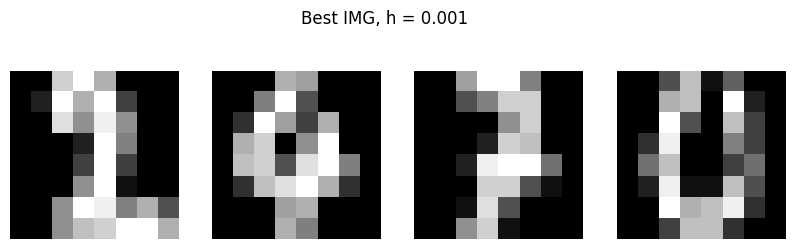

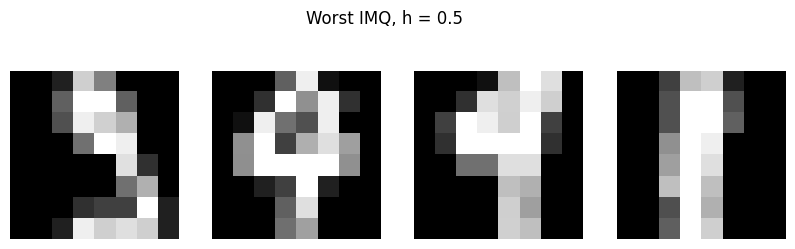

In [46]:
from sklearn.decomposition import PCA

#plotting good and bad examples
def plot_from_MMDResult(h,Text):
    h = 0.001
    kde = KernelDensity(bandwidth = h)
    kde.fit(X)
    sample = kde.sample(4)

    # Plotting
    fig, axes = plt.subplots(1, 4, figsize=(10, 3))
    fig.suptitle(Text)
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(sample[i].reshape(8, 8), cmap="gray")
        ax.axis("off")
    plt.show()
#Good MMD_SE
plot_from_MMDResult(0.001,'Best SE, h = 0.001')
#Bad MMD_SE
plot_from_MMDResult(0.5,'Worst SE, h = 0.5')
#GOOD_MMD_IMQ
plot_from_MMDResult(0.001,'Best IMG, h = 0.001')
#BAD_MMD_IMQ
plot_from_MMDResult(0.5,'Worst IMQ, h = 0.5')